In [1]:
# Data cleaning
# EDA
# Text preprocessing
# Model building
# Evaluation
# Improvement
# Website 
# Depoly

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
## Non null values - v1 , v2  
## we can remove cells 2,3,4 (many missing values)

In [9]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={'v1':'target','v2':'input-data'} , inplace=True)

In [12]:
df.head()

,target,input-data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.sample(5)

,target,input-data
3620,ham,That means from february to april i'll be gett...
1273,spam,network operator. The service is free. For T &...
4844,ham,Missing you too.pray inshah allah
3359,ham,Please attend the phone:)
1487,ham,I told your number to gautham..


In [14]:
import sklearn
from sklearn.preprocessing import LabelEncoder
print("scikit-learn is working!")

scikit-learn is working!


In [15]:
encoder = LabelEncoder()

In [16]:
df["target"] = encoder.fit_transform(df.target)

In [17]:
df.head()

,target,input-data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# check for missing values
df.isnull().sum()

target        0
input-data    0
dtype: int64

In [19]:
#check for duplicates
df.duplicated().sum()

np.int64(403)

In [20]:
# drop duplicates
df = df.drop_duplicates(keep='first')

In [21]:
df.head()

,target,input-data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5169 non-null   int64 
 1   input-data  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


# EDA (Explorary data analysis)

In [24]:
df.head()

,target,input-data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [26]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7ff96ee7ac90>,
 [Text(-1.014499732282844, 0.4251944181172162, 'Notspem'),
  Text(1.0144998708287172, -0.42519408755122207, 'spem')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

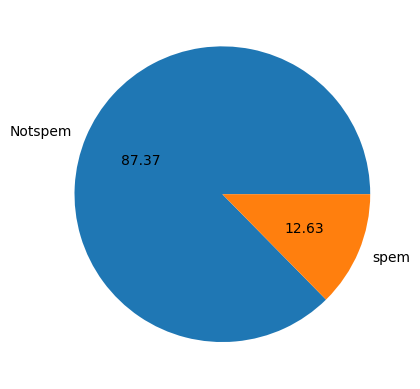

In [27]:
plt.pie(df['target'].value_counts(), labels=['Notspem','spem'],autopct="%0.2f")

In [1]:
import nltk

ModuleNotFoundError: No module named 'nltk'

In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ashok/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
df['num_char'] = df['input-data'].apply(len)

In [35]:
df.head()

,target,input-data,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
df['num_words'] = df['input-data'].apply(lambda x: len(nltk.word_tokenize(x)))


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/ashok/nltk_data'
    - '/home/ashok/Documents/python-code/n/nltk_data'
    - '/home/ashok/Documents/python-code/n/share/nltk_data'
    - '/home/ashok/Documents/python-code/n/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
!jupyter-lab .

Fail to get yarn configuration. Expecting value: line 1 column 1 (char 0)
[W 2025-01-07 08:04:43.032 ServerApp] A `_jupyter_server_extension_points` function was not found in notebook_shim. Instead, a `_jupyter_server_extension_paths` function was found and will be used for now. This function name will be deprecated in future releases of Jupyter Server.
[I 2025-01-07 08:04:43.040 ServerApp] jupyter_server_terminals | extension was successfully linked.
[I 2025-01-07 08:04:43.047 ServerApp] jupyterlab | extension was successfully linked.
[I 2025-01-07 08:04:43.532 ServerApp] notebook_shim | extension was successfully linked.
[I 2025-01-07 08:04:43.551 ServerApp] notebook_shim | extension was successfully loaded.
[I 2025-01-07 08:04:43.552 ServerApp] jupyter_server_terminals | extension was successfully loaded.
[I 2025-01-07 08:04:43.553 LabApp] JupyterLab extension loaded from /usr/lib/python3/dist-packages/jupyterlab
[I 2025-01-07 08:04:43.553 LabApp] JupyterLab application directory is

In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download('punkt', download_dir='nltk_data', force=True)
nltk.data.path.append('nltk_data')  # Add the nltk_data path explicitly


ModuleNotFoundError: No module named 'nltk'